In [10]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [91]:
# Loading the data
salary_threshold = pd.read_csv("Agent Salary and Eligibility Threshold.csv")
staffing = pd.read_csv("Existing Agent Staffing.csv")
sign_ups = pd.read_csv("Advertiser Sign-ups.csv")

# Merge country-specific staffing, agents salary and threshold info to one dataframe
agents = pd.merge(salary_threshold, staffing, on="Country", how="left")

# Add threshold to sign-ups to determine eligibility
sign_ups = sign_ups.merge(salary_threshold[["Country", "Advertiser_Eligibility_Threshold_USD"]], on="Country", how="left")

# Add year, month, day and eligibility columns to sign-ups
sign_ups['Sign_Up_Date'] = pd.to_datetime(sign_ups['Sign_Up_Date'])
sign_ups['Sign_Up_Year'] = sign_ups['Sign_Up_Date'].dt.year
sign_ups['Sign_Up_Month'] = sign_ups['Sign_Up_Date'].dt.month
sign_ups['Sign_Up_Day'] = sign_ups['Sign_Up_Date'].dt.day
sign_ups["Eligible"] = sign_ups["Advertiser_Eligibility_Threshold_USD"] < sign_ups["Projected_Annual_Budget"]
sign_ups_eligible = sign_ups[sign_ups["Eligible"]]

# Split sign-ups into 2023 and 2024
sign_ups2023 = sign_ups[sign_ups['Sign_Up_Year'] == 2023]
sign_ups2024 = sign_ups[sign_ups['Sign_Up_Year'] == 2024]

# Split sign-ups into eligible and ineligible for both years
sign_ups2023_eligible = sign_ups2023[sign_ups2023["Eligible"]]
sign_ups2024_eligible = sign_ups2024[sign_ups2024["Eligible"]]
sign_ups2023_ineligible = sign_ups2023[~sign_ups2023["Eligible"]]
sign_ups2024_ineligible = sign_ups2024[~sign_ups2024["Eligible"]]

In [93]:
# Loading the data
salary_threshold = pd.read_csv("Agent Salary and Eligibility Threshold.csv")
staffing = pd.read_csv("Existing Agent Staffing.csv")
sign_ups = pd.read_csv("Advertiser Sign-ups.csv")

# Merge country-specific staffing, agents salary and threshold info to one dataframe
agents = pd.merge(salary_threshold, staffing, on="Country", how="left")

# Add threshold to sign-ups to determine eligibility
sign_ups = sign_ups.merge(salary_threshold[["Country", "Advertiser_Eligibility_Threshold_USD"]], on="Country", how="left")

# Add year, month, day and eligibility columns to sign-ups
sign_ups['Sign_Up_Date'] = pd.to_datetime(sign_ups['Sign_Up_Date'])
sign_ups['Sign_Up_Year'] = sign_ups['Sign_Up_Date'].dt.year
sign_ups['Sign_Up_Month'] = sign_ups['Sign_Up_Date'].dt.month
sign_ups['Sign_Up_Day'] = sign_ups['Sign_Up_Date'].dt.day
sign_ups["Eligible"] = sign_ups["Advertiser_Eligibility_Threshold_USD"] < sign_ups["Projected_Annual_Budget"]
sign_ups_eligible = sign_ups[sign_ups["Eligible"]]

# Split sign-ups into 2023 and 2024
sign_ups2023 = sign_ups[sign_ups['Sign_Up_Year'] == 2023]
sign_ups2024 = sign_ups[sign_ups['Sign_Up_Year'] == 2024]

# Split sign-ups into eligible and ineligible for both years
sign_ups2023_eligible = sign_ups2023[sign_ups2023["Eligible"]]
sign_ups2024_eligible = sign_ups2024[sign_ups2024["Eligible"]]
sign_ups2023_ineligible = sign_ups2023[~sign_ups2023["Eligible"]]
sign_ups2024_ineligible = sign_ups2024[~sign_ups2024["Eligible"]]

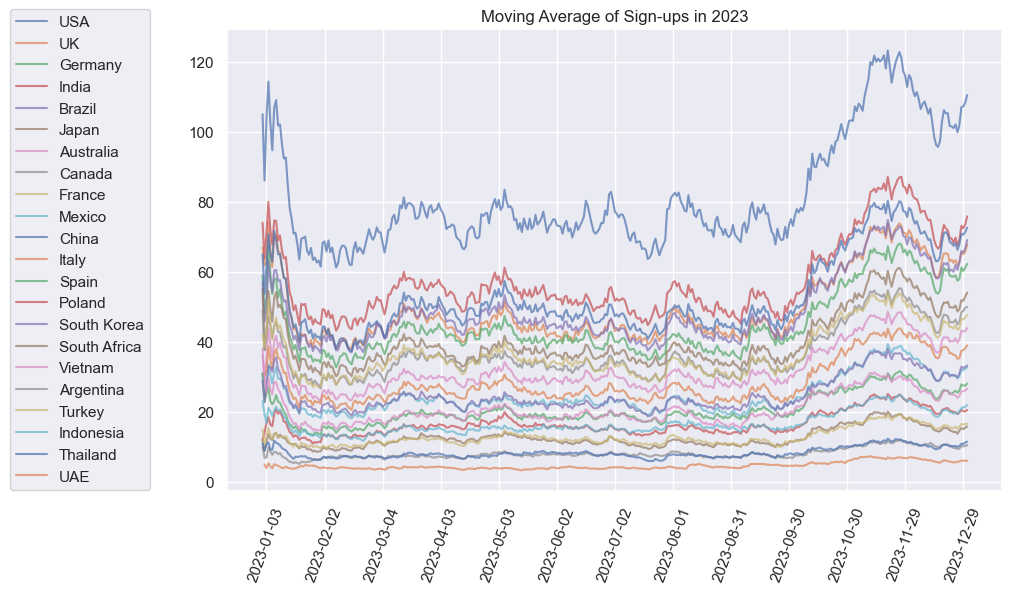

In [95]:
def countSignUps(df, country):
    ''' 
    Group by country and count the number of sign-ups
    '''

    df_grouped = pd.DataFrame(df
                            .loc[df["Country"] == country]
                            .groupby("Sign_Up_Date")
                            .count()["Advertiser_ID"])
    # df_grouped["Date"] = pd.to_datetime(year + '-' + df_grouped['Sign_Up_Month'].astype(str) + 
    #                '-' + df_grouped['Sign_Up_Day'].astype(str), format='%Y-%m-%d')
    df_grouped.index = df_grouped.index.rename("Date")
    df_grouped.columns = ["Sign_Ups"]
    df_grouped["Country"] = country
    return df_grouped

def visSignUps(sign_ups):
    ''' 
    Visualize the number of sign_ups, where sign_ups is a dataframe with a Date index and a Sign_Ups column 
    '''
    
    # Exponential Moving Average
    ewm = sign_ups[["Sign_Ups"]]
    ewm = ewm.ewm(times = ewm.index, halflife='15 days').mean()

    # Add Sign-ups, EMA and SMA
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.plot(sign_ups.index, sign_ups['Sign_Ups'], alpha = 0.3, label = "Sign-ups")
    ax.plot(ewm['Sign_Ups'], label = "Exponential Weighted Moving Average", color = "red", alpha = 0.7)
    ax.plot(sign_ups['Sign_Ups'].rolling(window=30).mean(), label = "30-day Moving Average", color = "green")

    # x ticks formatting - every 30 days
    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    plt.xticks(rotation=70)

    plt.title(f"Sign-ups in {sign_ups['Country'].iloc[0]}")
    plt.legend()
    plt.show()

def visSignUpsAll(sign_ups, year):
    ''' 
    Visualize the number of sign_ups for all countries
    '''

    fig, ax = plt.subplots(figsize=(10, 6))

    for country in sign_ups["Country"].unique():
        sign_ups_country_grouped = countSignUps(sign_ups, country)
        ewm = sign_ups_country_grouped[["Sign_Ups"]]
        ewm = ewm.ewm(times = ewm.index, halflife='15 days').mean()
        ax.plot(ewm['Sign_Ups'], label = f"{country}", alpha = 0.7)

    ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
    fig.legend(bbox_to_anchor=(-0.1, 0.1), loc='lower left', ncol=1)
    plt.xticks(rotation=70)

    plt.title(f"Moving Average of Sign-ups in {year}")
    plt.show()

sign_ups2023_USA_grouped = countSignUps(sign_ups2023, 'USA')
sign_ups2024_USA_grouped = countSignUps(sign_ups2024, 'USA')
sign_ups_USA_grouped = pd.concat([sign_ups2023_USA_grouped, sign_ups2024_USA_grouped])

#visSignUps(sign_ups2023_USA_grouped)

visSignUpsAll(sign_ups2023, 2023)

In [97]:
sign_ups2023_USA_grouped = countSignUps(sign_ups2023, 'USA')
sign_ups2024_USA_grouped = countSignUps(sign_ups2024, 'USA')
sign_ups_USA_grouped = pd.concat([sign_ups2023_USA_grouped, sign_ups2024_USA_grouped])

df_grouped = pd.DataFrame(sign_ups_eligible
                            .loc[sign_ups_eligible["Country"] == "USA"]
                            .groupby("Sign_Up_Date")["Projected_Annual_Budget"]
                            .mean())

budget_demand = pd.concat([sign_ups_USA_grouped, df_grouped], axis=1)
budget_demand = budget_demand[["Sign_Ups", "Projected_Annual_Budget"]]
budget_demand.columns = ["Demand", "Budget"]
budget_demand.head(5)

,Demand,Budget
2023-01-01,105,86415.490566
2023-01-02,68,84614.000000
2023-01-03,136,80838.070175
2023-01-04,144,84958.636364
2023-01-05,62,86109.344828


# DEMAND ARIMA

In [100]:
budget_demand.index = pd.to_datetime(budget_demand.index)

# Create forecast dates for 2025
forecast_dates = pd.date_range(start="2025-01-01", end="2025-12-31", freq="D")

# Set a weighting parameter:
alpha = 0.8

forecasted_demand = []
forecasted_budget = []

# For each forecast day, combine the historical average for that calendar day with the average of previous forecasts.
for date in forecast_dates:
    md = date.strftime("%m-%d")
    hist_demand = budget_demand[budget_demand.index.strftime("%m-%d") == md]["Demand"].mean()
    hist_budget = budget_demand[budget_demand.index.strftime("%m-%d") == md]["Budget"].mean()
    
    # previous forecasts from up to the last 30 days
    if len(forecasted_demand) > 0:
        window = forecasted_demand[-min(30, len(forecasted_demand)):]
        prev_mean_demand = np.mean(window)
    else:
        prev_mean_demand = hist_demand
        
    if len(forecasted_budget) > 0:
        window_b = forecasted_budget[-min(30, len(forecasted_budget)):]
        prev_mean_budget = np.mean(window_b)
    else:
        prev_mean_budget = hist_budget

    # the forecast as a weighted combination
    demand_forecast = alpha * hist_demand + (1 - alpha) * prev_mean_demand
    budget_forecast = alpha * hist_budget + (1 - alpha) * prev_mean_budget

    forecasted_demand.append(demand_forecast)
    forecasted_budget.append(budget_forecast)

#  Final forecast budget demand with the forecast_dates as index
forecast_df = pd.DataFrame({
    "Demand": forecasted_demand,
    "Budget": forecasted_budget
}, index=forecast_dates)

print(forecast_df.head())

             Demand        Budget
2025-01-01   77.500  86535.945283
2025-01-02   77.500  86823.336425
2025-01-03  100.300  77682.845130
2025-01-04  109.420  80077.248966
2025-01-05   54.636  87129.906721


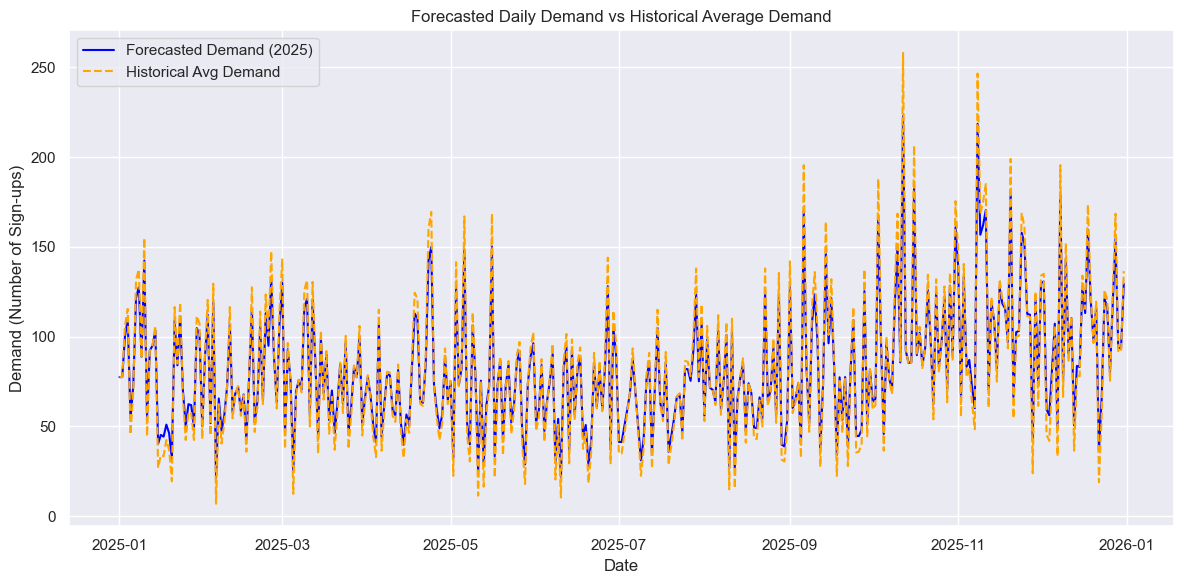

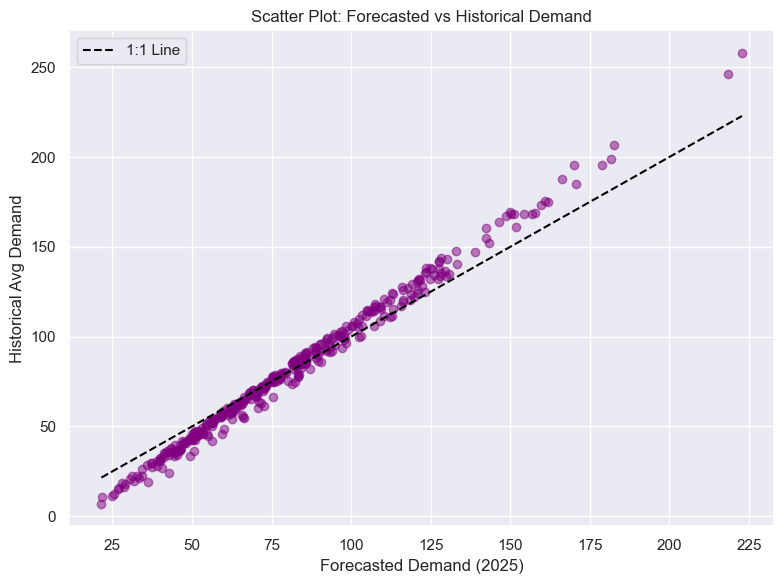

In [114]:
forecast_df.index = pd.to_datetime(forecast_df.index)
budget_demand.index = pd.to_datetime(budget_demand.index)

budget_demand["month_day"] = budget_demand.index.strftime('%m-%d')
hist_avg_demand = budget_demand.groupby("month_day")["Demand"].mean()
hist_avg_budget = budget_demand.groupby("month_day")["Budget"].mean()

# Map the historical averages to the forecast dates for 2025
def map_hist_values(date, hist_series):
    md = date.strftime('%m-%d')
    return hist_series.get(md, np.nan)

forecast_dates = forecast_df.index
hist_demand_2025 = forecast_dates.map(lambda d: map_hist_values(d, hist_avg_demand))
hist_budget_2025 = forecast_dates.map(lambda d: map_hist_values(d, hist_avg_budget))

# Time Series Comparison for Demand
plt.figure(figsize=(12,6))
plt.plot(forecast_df.index, forecast_df["Demand"], label="Forecasted Demand (2025)", color="blue")
plt.plot(forecast_df.index, hist_demand_2025, label="Historical Avg Demand", color="orange", linestyle="--")
plt.title("Forecasted Daily Demand vs Historical Average Demand")
plt.xlabel("Date")
plt.ylabel("Demand (Number of Sign-ups)")
plt.legend()
plt.tight_layout()
plt.show()

# Scatter Plot: Forecasted Demand vs Historical Average Demand
plt.figure(figsize=(8,6))
plt.scatter(forecast_df["Demand"], hist_demand_2025, alpha=0.5, color="purple")
plt.xlabel("Forecasted Demand (2025)")
plt.ylabel("Historical Avg Demand")
plt.title("Scatter Plot: Forecasted vs Historical Demand")
plt.plot([forecast_df["Demand"].min(), forecast_df["Demand"].max()],
         [forecast_df["Demand"].min(), forecast_df["Demand"].max()],
         color="black", linestyle="--", label="1:1 Line")
plt.legend()
plt.tight_layout()
plt.show()

In [102]:
threshold = forecast_df["Demand"].mean()

# Agents pool
free_agents = agents.loc[agents["Country"] == "USA"].loc[:,"Existing_Agent_Count"][0]

salary = agents.iloc[0,1]

Profit: 207316921.12229195


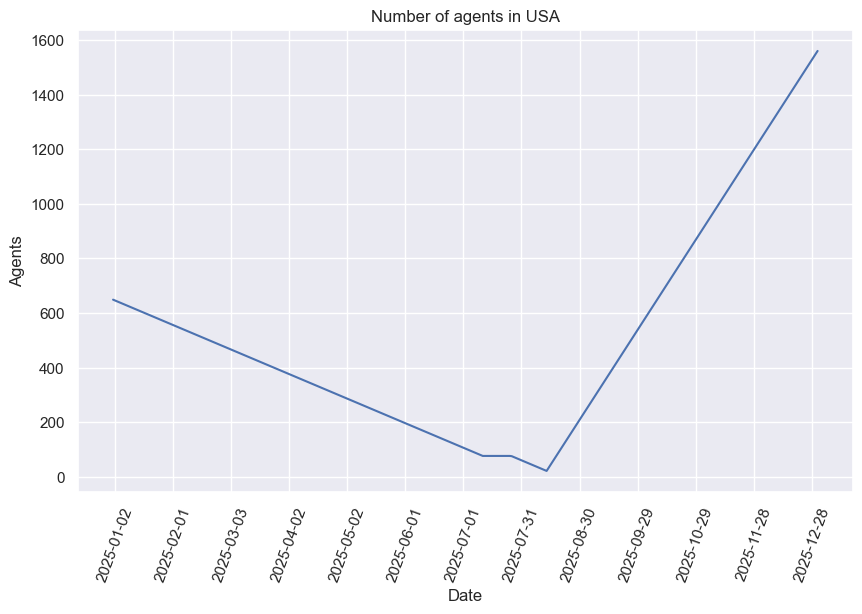

In [104]:
import seaborn as sns

agents_pool = np.array([[0 for i in range(10)] for _ in range(free_agents)])
adv_id = 1
advertiser_pool = []

start_index = forecast_df.index.get_loc("2025-01-01")
current_date = forecast_df.index[start_index]

Costs = 0
Rev = 0

uplift = 0.135

agent = []

for day in range(365):

    # Add new sign-ups to the pool
    todays_demand = forecast_df.loc[current_date]["Demand"]
    todays_budget = forecast_df.loc[current_date]["Budget"]
    for _ in range(int(todays_demand)):
        advertiser_pool.append([todays_budget, 0, adv_id])
        adv_id += 1

    advertiser_pool.sort(key = lambda x: x[0], reverse = True)
    
    # Demand info about next 60 days
    demand_next60 = forecast_df.loc[current_date:current_date + pd.Timedelta(days = 60)]["Demand"].mean()
    budget_next60 = forecast_df.loc[current_date:current_date + pd.Timedelta(days = 60)]["Budget"].mean()


    # If mean budget over next 60 days is higher than threshold, hire new agents
    if demand_next60 > threshold:
        # Hire H agents
        H = 11
        for _ in range(H):
            agents_pool = np.append(agents_pool, np.repeat(30,10)[np.newaxis, :], axis=0)

    #elif demand_next60 < 0.9 * threshold:
    else:
        # Try to fire F agents
        F = 3
        count_fired = 0
        idx_fired = []
        for i in range(agents_pool.shape[0]):
            if np.sum(agents_pool[i] > 30) == 0:
                Costs += 30 * salary/365
                Costs += 0.4 * salary
                idx_fired.append(i)
                count_fired += 1
                if count_fired == F:
                    break
        agents_pool = np.delete(agents_pool, idx_fired, axis=0)
        
    # Update costs
    Costs += agents_pool.shape[0] * salary/365

    # Assignment 
    ids_remove = []
    zero_indices = np.argwhere(agents_pool == 0)
    curr_pos = 0
    if zero_indices.shape[0] > 0:
        for i in range(len(advertiser_pool)):
            x, y = zero_indices[curr_pos]
            curr_pos += 1
            agents_pool[x][y] = 60

            Rev += advertiser_pool[i][0] * uplift
            ids_remove.append(advertiser_pool[i][2])
            if curr_pos >= zero_indices.shape[0]:
                break


    # Update agents pool
    for j in range(agents_pool.shape[0]):
        for spot in range(10):
            if agents_pool[j][spot] > 0:
                agents_pool[j][spot] -= 1

    advertiser_pool = [x for x in advertiser_pool if x[2] not in ids_remove]

    # Update advertisers count
    for i in range(len(advertiser_pool)):
        advertiser_pool[i][1] += 1
    
    advertiser_pool = [x for x in advertiser_pool if x[1] < 60]

    current_date += pd.Timedelta(days = 1)
    
    agent.append(agents_pool.shape[0])
                

Profit = Rev - Costs

print(f"Profit: {Profit}")

agent = np.array(agent)

dates = forecast_df.index[:agent.shape[0]]

fig, ax = plt.subplots(figsize=(10, 6))

dates_agents = pd.DataFrame({"Date": dates, "Agents": agent})

sns.set_theme()
sns.lineplot(dates_agents, x = "Date", y = "Agents")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=70)
plt.title(f"Number of agents in USA")
plt.show()

# Main Strategy

In [106]:
import math 

threshold = forecast_df["Demand"].mean()

free_agents = agents.loc[agents["Country"] == "USA"].loc[:,"Existing_Agent_Count"][0]

salary = agents.iloc[0,1]

best_profit = 0
best_alpha = 0

for alpha in np.linspace(1.1, 10, 10):

    # Agents pool
    agents_pool = np.array([[0 for i in range(10)] for _ in range(free_agents)])

    # Advertisers pool
    adv_id = 1
    advertiser_pool = []

    start_index = forecast_df.index.get_loc("2025-01-01")
    current_date = forecast_df.index[start_index]

    Costs = 0
    Rev = 0

    uplift = 0.135

    # Number of agents over time
    agent = [free_agents]

    for day in range(365):

        # Add new sign-ups to the pool
        todays_demand = forecast_df.loc[current_date]["Demand"]
        todays_budget = forecast_df.loc[current_date]["Budget"]

        # Add new advertisers to the pool
        for _ in range(int(todays_demand)):
            if math.isnan(todays_budget):
                advertiser_pool.append([0, 0, adv_id])
            else:
                advertiser_pool.append([todays_budget, 0, adv_id])
            adv_id += 1

        advertiser_pool.sort(key = lambda x: x[0], reverse = True)
        
        # Demand info about next 30 days
        demand_next30 = forecast_df.loc[current_date:current_date + pd.Timedelta(days = 30)]["Demand"].sum()

        slot_availability = np.argwhere(agents_pool < 30).shape[0]

        # If mean budget over next 60 days is higher than threshold, hire new agents
        if demand_next30 > slot_availability:
            # Hire H agents
            H = int((demand_next30-slot_availability)/10)
            #print("Hire", H, day)
            #print(demand_next30 - slot_availability)
            for _ in range(H):
                agents_pool = np.append(agents_pool, np.repeat(30,10)[np.newaxis, :], axis=0)

        elif slot_availability > alpha*demand_next30:
            
            # Try to fire F agents
            F = int(max(slot_availability - alpha*demand_next30, 0)/10)
            #print("Fire", F, day)
            count_fired = 0
            idx_fired = []
            for i in range(agents_pool.shape[0]):
                if np.sum(agents_pool[i] > 30) == 0:
                    Costs += 30 * salary/365
                    Costs += 0.4 * salary
                    idx_fired.append(i)
                    count_fired += 1
                    if count_fired == F:
                        break
            agents_pool = np.delete(agents_pool, idx_fired, axis=0)
            
        # Update costs
        Costs += agents_pool.shape[0] * salary/365

        # Assignment 
        ids_remove = []
        zero_indices = np.argwhere(agents_pool == 0)
        curr_pos = 0
        if zero_indices.shape[0] > 0:
            for i in range(len(advertiser_pool)):
                x, y = zero_indices[curr_pos]
                curr_pos += 1
                agents_pool[x][y] = 60

                Rev += advertiser_pool[i][0] * uplift
                ids_remove.append(advertiser_pool[i][2])
                if curr_pos >= zero_indices.shape[0]:
                    break


        # Update agents pool
        for j in range(agents_pool.shape[0]):
            for spot in range(10):
                if agents_pool[j][spot] > 0:
                    agents_pool[j][spot] -= 1

        # Remove assigned advertisers
        advertiser_pool = [x for x in advertiser_pool if x[2] not in ids_remove]

        # Update advertisers count of days in the pool
        for i in range(len(advertiser_pool)):
            advertiser_pool[i][1] += 1
        
        # Remove the ones that have been in the pool for 60 days
        advertiser_pool = [x for x in advertiser_pool if x[1] < 60]

        # Go to next day
        current_date += pd.Timedelta(days = 1)

        # Number of agents today
        agent.append(agents_pool.shape[0])
                    

    Profit = Rev - Costs

    if Profit > best_profit:
        best_profit = Profit
        best_alpha = alpha
        best_agents = agent


print(f"Profit = {best_profit}, alpha = {best_alpha}")

Profit = 286376774.49796677, alpha = 10.0


# Model with best Strategy

In [110]:
import math 

threshold = forecast_df["Demand"].mean()

free_agents = agents.loc[agents["Country"] == "USA"].loc[:,"Existing_Agent_Count"][0]

salary = agents.iloc[0,1]

# Agents pool
agents_pool = np.array([[0 for i in range(10)] for _ in range(free_agents)])

# Advertisers pool
adv_id = 1
advertiser_pool = []

start_index = forecast_df.index.get_loc("2025-01-01")
current_date = forecast_df.index[start_index]

Costs = 0
Rev = 0

uplift = 0.135

# Number of agents over time
agent = [free_agents]
agents_idle = [free_agents]

# Number of advertisers in the pool over time
adv_waiting = [0]

for day in range(365):

    # Add new sign-ups to the pool
    todays_demand = forecast_df.loc[current_date]["Demand"]
    todays_budget = forecast_df.loc[current_date]["Budget"]

    # Add new advertisers to the pool
    for _ in range(int(todays_demand)):
        if math.isnan(todays_budget):
            advertiser_pool.append([0, 0, adv_id])
        else:
            advertiser_pool.append([todays_budget, 0, adv_id])
        adv_id += 1

    advertiser_pool.sort(key = lambda x: x[0], reverse = True)
    
    # Demand info about next 30 days
    demand_next30 = forecast_df.loc[current_date:current_date + pd.Timedelta(days = 30)]["Demand"].sum()

    slot_availability = np.argwhere(agents_pool < 30).shape[0]

    # If mean budget over next 60 days is higher than threshold, hire new agents
    if demand_next30 > slot_availability:
        # Hire H agents
        H = int((demand_next30-slot_availability)/10)
        #print("Hire", H, day)
        #print(demand_next30 - slot_availability)
        for _ in range(H):
            agents_pool = np.append(agents_pool, np.repeat(30,10)[np.newaxis, :], axis=0)

    elif slot_availability > best_alpha*demand_next30:
        
        # Try to fire F agents
        F = int(max(slot_availability - best_alpha*demand_next30, 0)/10)
        #print("Fire", F, day)
        count_fired = 0
        idx_fired = []
        for i in range(agents_pool.shape[0]):
            if np.sum(agents_pool[i] > 30) == 0:
                Costs += 30 * salary/365
                Costs += 0.4 * salary
                idx_fired.append(i)
                count_fired += 1
                if count_fired == F:
                    break
        agents_pool = np.delete(agents_pool, idx_fired, axis=0)
        
    # Update costs
    Costs += agents_pool.shape[0] * salary/365

    # Assignment 
    ids_remove = []
    zero_indices = np.argwhere(agents_pool == 0)
    curr_pos = 0
    if zero_indices.shape[0] > 0:
        for i in range(len(advertiser_pool)):
            x, y = zero_indices[curr_pos]
            curr_pos += 1
            agents_pool[x][y] = 60

            Rev += advertiser_pool[i][0] * uplift
            ids_remove.append(advertiser_pool[i][2])
            if curr_pos >= zero_indices.shape[0]:
                break


    # Update agents pool
    for j in range(agents_pool.shape[0]):
        for spot in range(10):
            if agents_pool[j][spot] > 0:
                agents_pool[j][spot] -= 1

    # Remove assigned advertisers
    advertiser_pool = [x for x in advertiser_pool if x[2] not in ids_remove]

    # Update advertisers count of days in the pool
    for i in range(len(advertiser_pool)):
        advertiser_pool[i][1] += 1
    
    # Remove the ones that have been in the pool for 60 days
    advertiser_pool = [x for x in advertiser_pool if x[1] < 60]

    # Go to next day
    current_date += pd.Timedelta(days = 1)

    # Number of agents today
    agent.append(agents_pool.shape[0])

    adv_waiting.append(len(advertiser_pool))

    count_idle = 0
    for agent_row in agents_pool:
        if np.sum(agent_row) == 0:
            count_idle += 1
            
    agents_idle.append(count_idle)
                

Profit = Rev - Costs


print(f"Profit = {Profit}")

Profit = 286376774.49796677


# Updates forecasts each day

In [175]:
# Sensitivity parameter for correction factor; adjust as needed.
gamma = 0.5
# Rolling window (number of days) to compute average assignment ratio.
rolling_window = 7

# Assume forecast_df, agents, best_alpha, etc. are already defined as in your original code.
threshold = forecast_df["Demand"].mean()

free_agents = agents.loc[agents["Country"] == "USA"].loc[:,"Existing_Agent_Count"].values[0]
salary = agents.loc[agents["Country"] == "USA"].iloc[0]["Annual_Agent_Salary_USD"]

# Initialize agent pool: each row is an agent with 10 slots (0 indicates available)
agents_pool = np.array([[0 for i in range(10)] for _ in range(free_agents)])

# Initialize advertiser pool: each advertiser is [budget, waiting_days, advertiser_id]
adv_id = 1
advertiser_pool = []

start_index = forecast_df.index.get_loc("2025-01-01")
current_date = forecast_df.index[start_index]

Costs = 0
Rev = 0
uplift = 0.135

# For tracking over time (optional)
agent_history = [free_agents]
agents_idle_history = [free_agents]
adv_waiting_history = [0]

# For rolling average of assignment ratios:
daily_assignment_ratios = []

for day in range(365):
    advertiser_assignments_today = 0
    new_signups = 0
    hires_today = 0
    fires_today = 0
    revenue_today = 0
    cost_today = 0
    
    # --- 1. Add new sign-ups to the advertiser pool ---
    todays_demand = forecast_df.loc[current_date]["Demand"]
    todays_budget = forecast_df.loc[current_date]["Budget"]
    for _ in range(int(todays_demand)):
        if math.isnan(todays_budget):
            advertiser_pool.append([0, 0, adv_id])
        else:
            advertiser_pool.append([todays_budget, 0, adv_id])
        adv_id += 1
        new_signups += 1

    advertiser_pool.sort(key=lambda x: x[0], reverse=True)
    
    # --- 2. Lookahead: Get the forecast for the next 30 days ---
    future_forecast = forecast_df.loc[current_date: current_date + pd.Timedelta(days=30)]["Demand"].sum()
    
    # --- 3. Update the correction factor based on rolling average of actual performance ---
    # (We assume that if fewer advertisers are being assigned relative to forecasted demand,
    # then the actual demand might be lower than the raw forecast.)
    # Here, we compute today's assignment ratio.
    # Note: In a real simulation, you might have the actual assignments from today.
    # For this example, we use the following placeholder:
    if todays_demand > 0:
        ratio_today = advertiser_assignments_today / todays_demand  # Initially, zero since assignments haven't been done.
    else:
        ratio_today = 1.0
    # Append today's ratio to the rolling list:
    daily_assignment_ratios.append(ratio_today)
    # Use the last 'rolling_window' days (or fewer if not available) to compute average ratio:
    if len(daily_assignment_ratios) > rolling_window:
        recent_ratio = np.mean(daily_assignment_ratios[-rolling_window:])
    else:
        recent_ratio = np.mean(daily_assignment_ratios)
    # Compute correction factor (you can clip it if needed):
    correction = 1 - gamma * recent_ratio
    predicted_demand_next30 = future_forecast * correction

    # --- 4. Staffing Decisions using predicted_demand_next30 ---
    slot_availability = np.argwhere(agents_pool < 30).shape[0]
    if predicted_demand_next30 > slot_availability:
        H = int((predicted_demand_next30 - slot_availability) / 10)
        for _ in range(H):
            agents_pool = np.append(agents_pool, np.repeat(30, 10)[np.newaxis, :], axis=0)
            Costs += salary / 365
            hires_today += 1
    elif slot_availability > best_alpha * predicted_demand_next30:
        F = int(max(slot_availability - best_alpha * predicted_demand_next30, 0) / 10)
        count_fired = 0
        idx_fired = []
        for i in range(agents_pool.shape[0]):
            if np.sum(agents_pool[i] > 30) == 0:
                Costs += 30 * salary / 365
                Costs += 0.4 * salary
                idx_fired.append(i)
                count_fired += 1
                if count_fired == F:
                    break
        agents_pool = np.delete(agents_pool, idx_fired, axis=0)
        fires_today = len(idx_fired)
    
    # --- 5. Update costs (daily) ---
    daily_agent_cost = agents_pool.shape[0] * salary / 365
    Costs += daily_agent_cost
    cost_today += daily_agent_cost

    # --- 6. Assignment: assign advertisers to available slots ---
    ids_remove = []
    zero_indices = np.argwhere(agents_pool == 0)
    curr_pos = 0
    if zero_indices.shape[0] > 0:
        for i in range(len(advertiser_pool)):
            if curr_pos >= zero_indices.shape[0]:
                break
            x, y = zero_indices[curr_pos]
            curr_pos += 1
            agents_pool[x][y] = 60  # set support period to 60 days
            revenue_today += advertiser_pool[i][0] * uplift
            ids_remove.append(advertiser_pool[i][2])
            advertiser_assignments_today += 1

    Rev += revenue_today

    # --- 7. Update agents pool (decrement countdown) ---
    for j in range(agents_pool.shape[0]):
        for spot in range(10):
            if agents_pool[j][spot] > 0:
                agents_pool[j][spot] -= 1

    # --- 8. Remove assigned advertisers ---
    advertiser_pool = [adv for adv in advertiser_pool if adv[2] not in ids_remove]

    # --- 9. Update waiting days and remove advertisers waiting ≥ 60 days ---
    for i in range(len(advertiser_pool)):
        advertiser_pool[i][1] += 1
    advertiser_pool = [adv for adv in advertiser_pool if adv[1] < 60]

    # --- Update rolling average with actual ratio from today ---
    # Now that assignments are done, compute the actual ratio for today
    if todays_demand > 0:
        actual_ratio = advertiser_assignments_today / todays_demand
    else:
        actual_ratio = 1.0
    daily_assignment_ratios[-1] = actual_ratio  # update today's ratio

    # Advance to next day
    current_date += pd.Timedelta(days=1)
    
    # --- Record metrics ---
    agent_history.append(agents_pool.shape[0])
    adv_waiting_history.append(len(advertiser_pool))
    count_idle = sum(1 for row in agents_pool if np.sum(row) == 0)
    agents_idle_history.append(count_idle)
    
    # (Optional) You can record additional daily metrics if needed.

Profit = Rev - Costs
print(f"Profit = {Profit}")


Profit = 290991485.4897464


# Sensitiviy Analysis

In [211]:
# Sensitivity parameter for correction factor; adjust as needed.
gamma = 0.09
# Rolling window (number of days) to compute average assignment ratio.
rolling_window = 7

# ----- Sensitivity Parameter (tweak for analysis) -----
best_alpha = 30 # For firing decision: can vary to see sensitivity

threshold = forecast_df["Demand"].mean()


free_agents = agents.loc[agents["Country"] == "USA"].loc[:, "Existing_Agent_Count"].values[0]
salary = agents.loc[agents["Country"] == "USA"].iloc[0]["Annual_Agent_Salary_USD"]


agents_pool = np.array([[0 for i in range(10)] for _ in range(free_agents)])


adv_id = 1
advertiser_pool = []


start_index = forecast_df.index.get_loc("2025-01-01")
current_date = forecast_df.index[start_index]


Costs = 0
Rev = 0
uplift = 0.135  


daily_metrics = []

# Simulation Loop 
for day in range(365):
    new_signups = 0
    hires_today = 0
    fires_today = 0
    revenue_today = 0
    cost_today = 0
    
    todays_demand = forecast_df.loc[current_date]["Demand"]
    todays_budget = forecast_df.loc[current_date]["Budget"]
    
    for _ in range(int(todays_demand)):
        # If budget is NaN, assign 0
        if math.isnan(todays_budget):
            advertiser_pool.append([0, 0, adv_id])
        else:
            advertiser_pool.append([todays_budget, 0, adv_id])
        adv_id += 1
        new_signups += 1

    # Sort advertiser pool in descending order by budget
    advertiser_pool.sort(key=lambda x: x[0], reverse=True)

    # --- 2. Lookahead: Get the forecast for the next 30 days ---
    future_forecast = forecast_df.loc[current_date: current_date + pd.Timedelta(days=30)]["Demand"].sum()
    
    # --- 3. Update the correction factor based on rolling average of actual performance ---
    # (We assume that if fewer advertisers are being assigned relative to forecasted demand,
    # then the actual demand might be lower than the raw forecast.)
    # Here, we compute today's assignment ratio.
    # Note: In a real simulation, you might have the actual assignments from today.
    # For this example, we use the following placeholder:
    if todays_demand > 0:
        ratio_today = advertiser_assignments_today / todays_demand  # Initially, zero since assignments haven't been done.
    else:
        ratio_today = 1.0
    # Append today's ratio to the rolling list:
    daily_assignment_ratios.append(ratio_today)
    # Use the last 'rolling_window' days (or fewer if not available) to compute average ratio:
    if len(daily_assignment_ratios) > rolling_window:
        recent_ratio = np.mean(daily_assignment_ratios[-rolling_window:])
    else:
        recent_ratio = np.mean(daily_assignment_ratios)
    # Compute correction factor (you can clip it if needed):
    correction = 1 - gamma * recent_ratio
    predicted_demand_next30 = future_forecast * correction
    
    # Count available slots in agents_pool
    slot_availability = np.argwhere(agents_pool < 30).shape[0]
    
    # Hiring Decision
    # --- 4. Staffing Decisions using predicted_demand_next30 ---
    slot_availability = np.argwhere(agents_pool < 30).shape[0]
    if predicted_demand_next30 > slot_availability:
        H = int((predicted_demand_next30 - slot_availability) / 10)
        for _ in range(H):
            agents_pool = np.append(agents_pool, np.repeat(30, 10)[np.newaxis, :], axis=0)
            Costs += salary / 365
            hires_today += 1
    elif slot_availability > best_alpha * predicted_demand_next30:
        F = int(max(slot_availability - best_alpha * predicted_demand_next30, 0) / 10)
        count_fired = 0
        idx_fired = []
        for i in range(agents_pool.shape[0]):
            if np.sum(agents_pool[i] > 30) == 0:
                Costs += 30 * salary / 365
                Costs += 0.4 * salary
                idx_fired.append(i)
                count_fired += 1
                if count_fired == F:
                    break
        agents_pool = np.delete(agents_pool, idx_fired, axis=0)
        fires_today = len(idx_fired)
    
    # Update Daily Cost
    daily_agent_cost = agents_pool.shape[0] * salary / 365
    Costs += daily_agent_cost
    cost_today += daily_agent_cost
    
    # Assignment
    ids_remove = []
    zero_indices = np.argwhere(agents_pool == 0)  # indices of available slots
    curr_pos = 0
    if zero_indices.shape[0] > 0:
        for i in range(len(advertiser_pool)):
            if curr_pos >= zero_indices.shape[0]:
                break
            x, y = zero_indices[curr_pos]
            curr_pos += 1
            # Assign advertiser to this slot with a support period of 60 days
            agents_pool[x][y] = 60
            revenue_today += advertiser_pool[i][0] * uplift
            ids_remove.append(advertiser_pool[i][2])
    Rev += revenue_today
    
    # Update Agents Pool
    for j in range(agents_pool.shape[0]):
        for spot in range(10):
            if agents_pool[j][spot] > 0:
                agents_pool[j][spot] -= 1


    # --- Update rolling average with actual ratio from today ---
    # Now that assignments are done, compute the actual ratio for today
    if todays_demand > 0:
        actual_ratio = advertiser_assignments_today / todays_demand
    else:
        actual_ratio = 1.0
    daily_assignment_ratios[-1] = actual_ratio  # update today's ratio
    
    
    #  Remove Assigned Advertisers from Pool 
    advertiser_pool = [adv for adv in advertiser_pool if adv[2] not in ids_remove]
    
    # Update Waiting Time for Advertisers and remove those waiting >= 60 days
    for i in range(len(advertiser_pool)):
        advertiser_pool[i][1] += 1
    advertiser_pool = [adv for adv in advertiser_pool if adv[1] < 60]
    
    # Record Daily Metrics 
    day_metrics = {
        "Day": day + 1,
        "Date": current_date,
        "New_Signups": new_signups,
        "Hires": hires_today,
        "Fires": fires_today,
        "Agents": agents_pool.shape[0],
        "Idle_Agents": sum(1 for row in agents_pool if np.sum(row) == 0),
        "Waiting_Advertisers": len(advertiser_pool),
        "Daily_Revenue": revenue_today,
        "Daily_Cost": cost_today,
        "Daily_Profit": revenue_today - cost_today
    }
    daily_metrics.append(day_metrics)
    
    current_date += pd.Timedelta(days=1)

Profit = Rev - Costs
print(f"Profit = {Profit}")

metrics_df = pd.DataFrame(daily_metrics)
print(metrics_df.head())

Profit = 295761212.61303383
   Day       Date  New_Signups  Hires  Fires  Agents  Idle_Agents  \
0    1 2025-01-01           77      0      0     652          644   
1    2 2025-01-02           77      0      0     652          636   
2    3 2025-01-03          100      0      0     652          626   
3    4 2025-01-04          109      0      0     652          615   
4    5 2025-01-05           54      0      0     652          610   

   Waiting_Advertisers  Daily_Revenue     Daily_Cost  Daily_Profit  
0                    0   8.995412e+05  138833.128767  7.607080e+05  
1                    0   9.025286e+05  138833.128767  7.636955e+05  
2                    0   1.048718e+06  138833.128767  9.098853e+05  
3                    0   1.178337e+06  138833.128767  1.039504e+06  
4                    0   6.351770e+05  138833.128767  4.963439e+05  


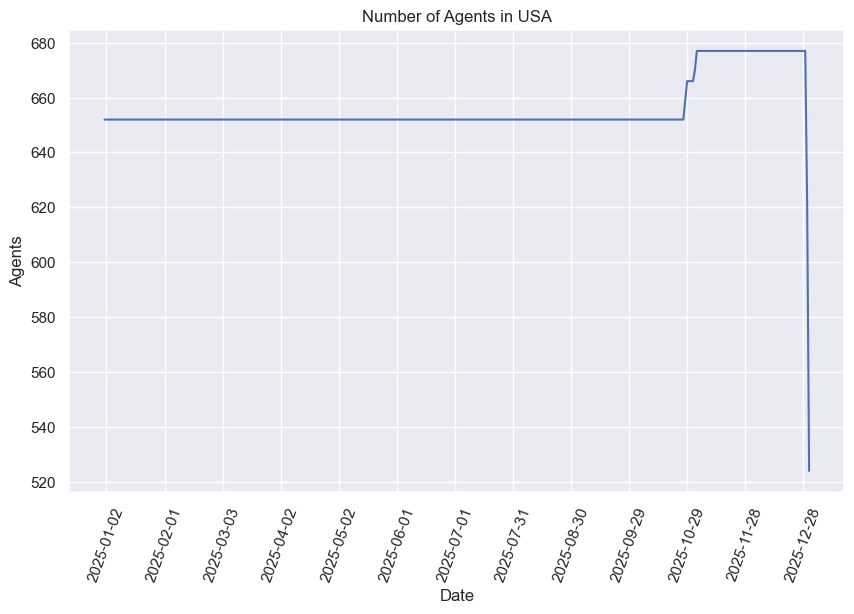

In [213]:
agent = np.array(best_agents).flatten()

N = min(len(forecast_df.index), len(agent))
dates = forecast_df.index[:N]
agent = agent[:N]

dates_agents = pd.DataFrame({"Date": dates, "Agents": agent})

sns.set_theme()
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(data=dates_agents, x="Date", y="Agents", ax=ax)
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=70)
plt.title("Number of Agents in USA")
plt.show()

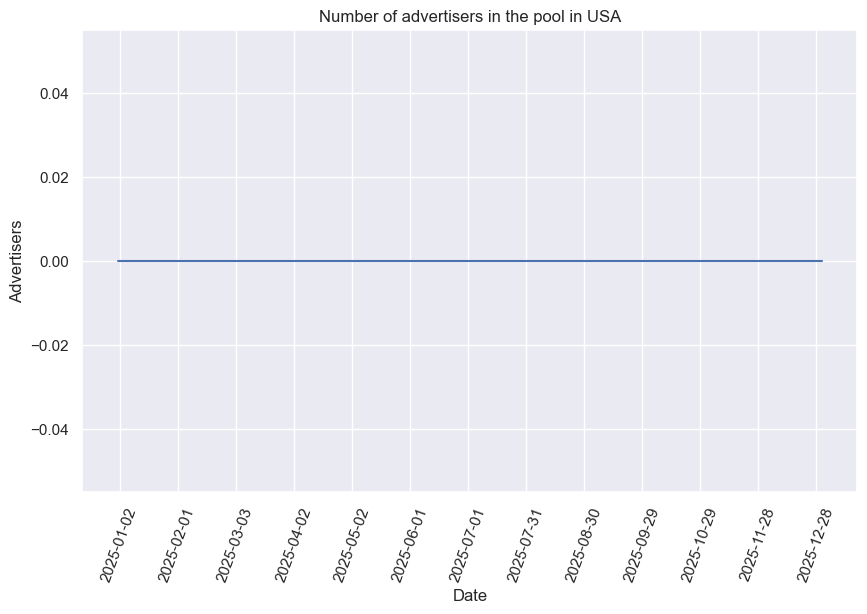

In [215]:
adv_waiting = np.array(adv_waiting).flatten()
N = min(len(forecast_df.index), len(adv_waiting))
dates = forecast_df.index[:N]
adv_waiting = adv_waiting[:N]

fig, ax = plt.subplots(figsize=(10, 6))

dates_adv = pd.DataFrame({"Date": dates, "Advertisers": adv_waiting})

sns.set_theme()
sns.lineplot(dates_adv, x = "Date", y = "Advertisers")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=70)
plt.title(f"Number of advertisers in the pool in USA")
plt.show()

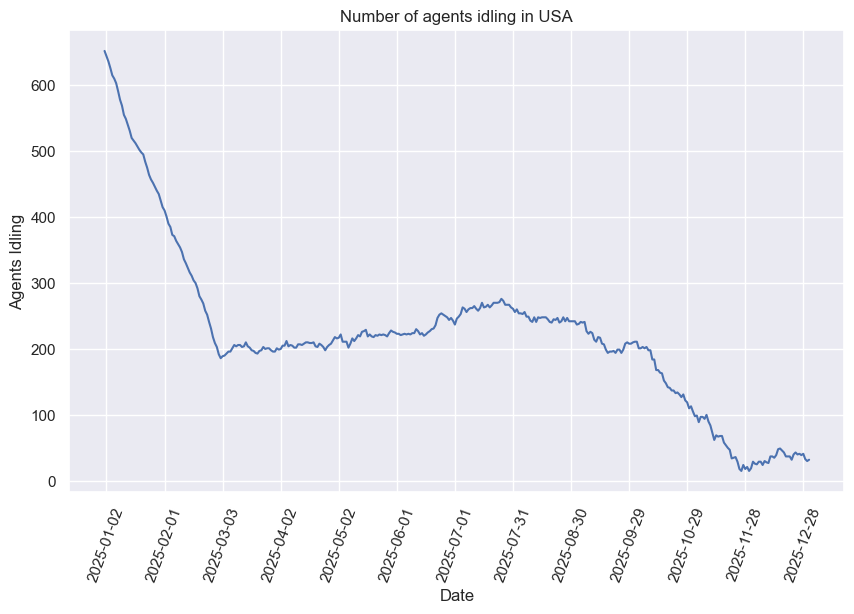

In [217]:
agents_idle = np.array(agents_idle).flatten()
N = min(len(forecast_df.index), len(agents_idle))
dates = forecast_df.index[:N]
agents_idle = agents_idle[:N]

fig, ax = plt.subplots(figsize=(10, 6))

dates_idle = pd.DataFrame({"Date": dates, "Agents Idling": agents_idle})

sns.set_theme()
sns.lineplot(dates_idle, x = "Date", y = "Agents Idling")
ax.xaxis.set_major_locator(mdates.DayLocator(interval=30))
plt.xticks(rotation=70)
plt.title(f"Number of agents idling in USA")
plt.show()